In [45]:
Pkg.status()

No packages installed


In [46]:
using Distributions
using Gadfly


function parse_csv(qualified)
  data = readcsv("data/2013.csv")
  r,c = size(data)
  number = 1
  fg3_perc = Float64[]
  fg3_attempted = Int64[]
  temp_fg3 = 0
  temp_fg3_attempted = 0
  # temp_games = 0
  # row = data[2,1:30]
  # println(row[12])
  # b = row[1] == number
  # println(b)
  for i in 2:r
    row = data[i,1:30]
    if row[1] == number || i == 1
      temp_fg3 += convert(Int64,row[12])
      temp_fg3_attempted += convert(Int64,row[13])
  #     temp_games = row[5]
    else
      temp_fg_perc = 0
      if temp_fg3_attempted != 0
        temp_fg_perc = temp_fg3/temp_fg3_attempted
      end
      if !qualified || temp_fg3>=82
        push!(fg3_perc,temp_fg_perc)
        push!(fg3_attempted,temp_fg3_attempted)
      end
      temp_fg3 = convert(Int64,row[12])
      temp_fg3_attempted = convert(Int64,row[13])
      number += 1
   end
  end
  return fg3_perc,fg3_attempted
end

fg3_perc_qua, fg3_attempted_qua = parse_csv(true)
println(length(fg3_perc_qua))
println(length(fg3_attempted_qua))

# finds the covariance for two data sets of equal length
function covariance(X,Y)
    mX = mean(X)
    mY = mean(Y)
    len = length(X)
    cov = 0
    for i in 1:len
        cov += (X[i]-mX)*(Y[i]-mY)
    end
    return cov/(len-1) 
end

function correlate(X,Y)
    return cov(X,Y)/(std(X)*std(Y))
end
        

println(covariance(fg3_perc_qua,fg3_attempted_qua))
println(correlate(fg3_perc_qua,fg3_attempted_qua))

# this function returns a standardized histogram, namely a histogram that has area 1
# when all the different bars are added
#
# input: all_data :: list of ints
#        bin_size :: the width that will be used to display each bin

# output: standardized histogram
function stand_hist(all_data,bin_size)
    return all_data/(sum(all_data)*bin_size)
end

# (sigma of j of abs(f(xj) - p(xj))^j)/ord(j)
function hist_fit_height(dist,data,bins,power :: Int64)
    fit = 0
    for x in 1:length(data)
        fit += abs(pdf(dist,bins[x])-data[x])^power
    end
    return mean(fit)
end

function hist_fit_area(dist,data,bins,riemann)
    len = length(data)
    bin_size = (bins[1]-bins[end])/len
    undo_midpoint = push!(collect(bins)-(bin_size/2),bins[end]+bin_size/2)
    area_before = cdf(dist,undo_midpoint[1])
    area_after = 1-cdf(dist,undo_midpoint[end])
    # measuring the difference between the distribution in 
    # question where the histogram values are not equal to 0
    in_graph = 0
    for x in 1:len
        hist_height = data[x]
        start = undo_midpoint[x]
        fin = undo_midpoint[x+1]
        width = (fin-start)/riemann
        width_area = hist_height*width
        for i in 1:riemann
            left = cdf(dist,start)
            start+=width
            right = cdf(dist,start)
            in_graph+=abs(right-left-width_area)
            left = right
        end
    end
    return area_before+in_graph+area_after
end

function midpoint(e)
    return (e[1:end-1]+e[2:end])/2
end

        

v_perc_qua = var(fg3_perc_qua)
m_perc_qua = mean(fg3_perc_qua)


e_qual_perc, perc_counts_qual = hist(fg3_perc_qua, 60)

qual_perc_normal_fit = fit(Normal, fg3_perc_qua)



# pdf(d, x)
# The pdf value(s) evaluated at x.
#Beta(a, b)    # Beta distribution with shape parameters a and b

106
106
0.48532999315686887
0.13729915886985056


Normal(μ=0.37435037582913316, σ=0.032802622787716756)

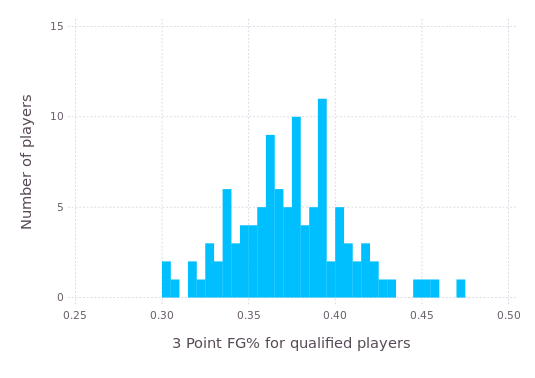

In [47]:
# do I integrate the beta distribution pdf over each interval?
x_qual_perc = midpoint(e_qual_perc)
bin_size_qual_perc = 0.005


# plot for 3P%
plot(x = x_qual_perc, y = perc_counts_qual, Geom.bar,
Guide.xlabel("3 Point FG% for qualified players"),
Guide.ylabel("Number of players", orientation=:vertical))

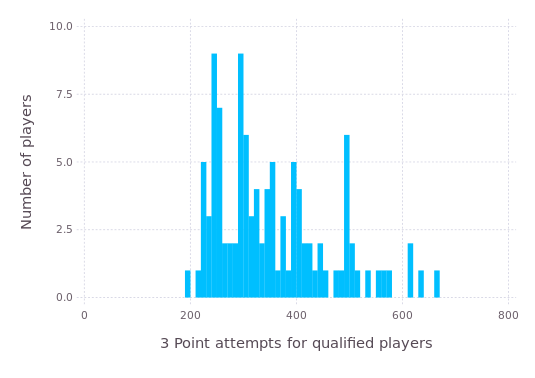

In [48]:
# plot for 3P attempts

v_attempted_qua = var(fg3_attempted_qua)
m_attempted_qua = mean(fg3_attempted_qua)

e_qual_att, att_counts_qual = hist(fg3_attempted_qua, 60)
x_qual_att = midpoint(e_qual_att)
bin_size_qual_att = 10

plot(x = x_qual_att, y = att_counts_qual,  Geom.bar,
Guide.xlabel("3 Point attempts for qualified players"),
Guide.ylabel("Number of players", orientation=:vertical))

Normal(μ=0.37435037582913316, σ=0.032802622787716756)0.4020033963195458
76.74566195654111
324.40735638351003


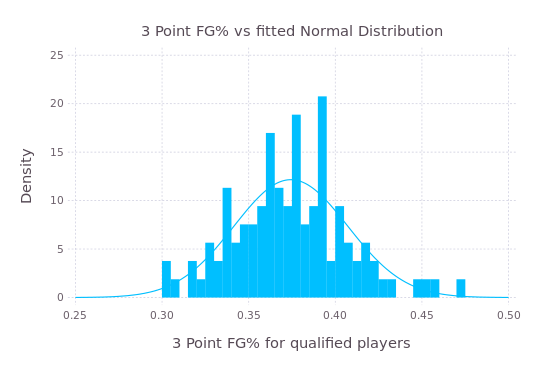

In [49]:
# plot for probablistic histogram for qualified percentage

# standardizing the histogram for the qualified
hist_perc_prob_qual = stand_hist(perc_counts_qual,bin_size_qual_perc)

qual_perc_normal_fit = fit(Normal, fg3_perc_qua)
print(qual_perc_normal_fit)


comp_perc_normal_fit =
    hist_fit_area(qual_perc_normal_fit,hist_perc_prob_qual,x_qual_perc,100)
println(comp_perc_normal_fit)

comp_perc_normal_height_lin = 
    hist_fit_height(qual_perc_normal_fit,hist_perc_prob_qual,x_qual_perc,1)
println(comp_perc_normal_height_lin)

comp_perc_normal_height_squared =
    hist_fit_height(qual_perc_normal_fit,hist_perc_prob_qual,x_qual_perc,2)
println(comp_perc_normal_height_squared)

plot(layer(x = x_qual_perc, y = hist_perc_prob_qual, Geom.bar),
layer([x -> pdf(qual_perc_normal_fit, x)]
      , .25, .5),
Guide.xlabel("3 Point FG% for qualified players"),
Guide.ylabel("Density", orientation=:vertical),
Guide.title("3 Point FG% vs fitted Normal Distribution"))




Beta(α=80.34060836677995, β=134.27279542328384)
0.4021660343777078
77.00319613432055
326.0632292730153


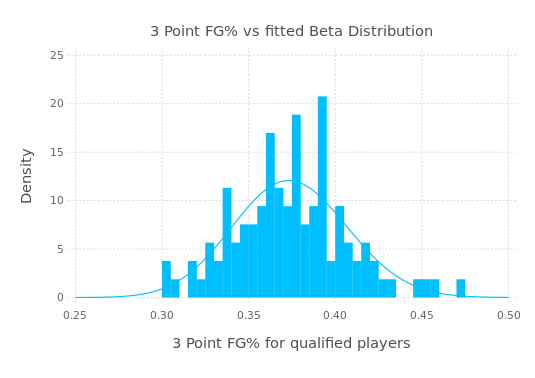

In [50]:
qual_perc_beta_fit = fit(Beta,fg3_perc_qua)
println(qual_perc_beta_fit)

comp_perc_beta_fit = 
    hist_fit_area(qual_perc_beta_fit,hist_perc_prob_qual,x_qual_perc,100)
println(comp_perc_beta_fit)

comp_perc_beta_height_lin = 
    hist_fit_height(qual_perc_beta_fit,hist_perc_prob_qual,x_qual_perc,1)
println(comp_perc_beta_height_lin)

comp_perc_beta_height_squared = 
    hist_fit_height(qual_perc_beta_fit,hist_perc_prob_qual,x_qual_perc,2)
println(comp_perc_beta_height_squared)

plot(layer(x = x_qual_perc, y = hist_perc_prob_qual, Geom.bar),
layer([x -> pdf(qual_perc_beta_fit, x)]
      , .25, .5),
Guide.xlabel("3 Point FG% for qualified players"),
Guide.ylabel("Density", orientation=:vertical),
Guide.title("3 Point FG% vs fitted Beta Distribution"))

Cauchy(μ=0.3743689320388349, σ=0.0203977992815271)
0.5632342294569357
80.61355243025228
401.8764415340682


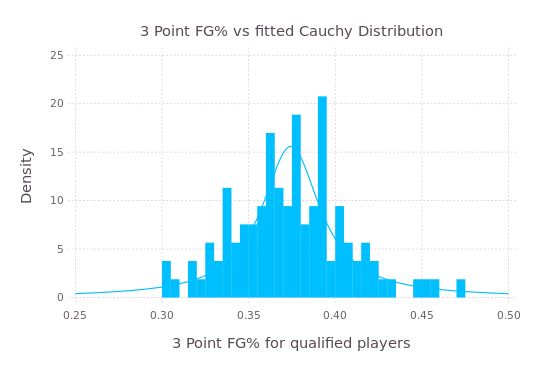

In [51]:
qual_perc_cauchy_fit = fit(Cauchy,fg3_perc_qua)
println(qual_perc_cauchy_fit)

comp_perc_cauchy_fit = 
    hist_fit_area(qual_perc_cauchy_fit,hist_perc_prob_qual,x_qual_perc,100)
println(comp_perc_cauchy_fit)

comp_perc_cauchy_height_lin = 
    hist_fit_height(qual_perc_cauchy_fit,hist_perc_prob_qual,x_qual_perc,1)
println(comp_perc_cauchy_height_lin)

comp_perc_cauchy_height_squared = 
    hist_fit_height(qual_perc_cauchy_fit,hist_perc_prob_qual,x_qual_perc,2)
println(comp_perc_cauchy_height_squared)

plot(layer(x = x_qual_perc, y = hist_perc_prob_qual, Geom.bar),
layer([x -> pdf(qual_perc_cauchy_fit, x)]
      , .25, .5),
Guide.xlabel("3 Point FG% for qualified players"),
Guide.ylabel("Density", orientation=:vertical),
Guide.title("3 Point FG% vs fitted Cauchy Distribution"))

Laplace(μ=0.3743689320388349, θ=0.028604122865247435)
0.4542276896569735
74.31629131562873
361.0576380856093


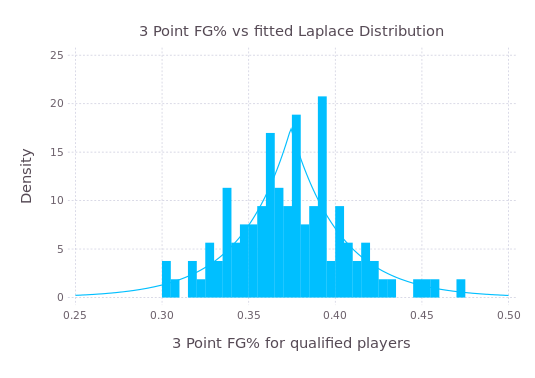

In [52]:
qual_perc_laplace_fit = fit(Laplace,fg3_perc_qua)
println(qual_perc_laplace_fit)

comp_perc_laplace_fit = 
    hist_fit_area(qual_perc_laplace_fit,hist_perc_prob_qual,x_qual_perc,100)
println(comp_perc_laplace_fit)

comp_perc_laplace_height_lin = 
    hist_fit_height(qual_perc_laplace_fit,hist_perc_prob_qual,x_qual_perc,1)
println(comp_perc_laplace_height_lin)

comp_perc_laplace_height_squared = 
    hist_fit_height(qual_perc_laplace_fit,hist_perc_prob_qual,x_qual_perc,2)
println(comp_perc_laplace_height_squared)

plot(layer(x = x_qual_perc, y = hist_perc_prob_qual, Geom.bar),
layer([x -> pdf(qual_perc_laplace_fit, x)]
      , .25, .5),
Guide.xlabel("3 Point FG% for qualified players"),
Guide.ylabel("Density", orientation=:vertical),
Guide.title("3 Point FG% vs fitted Laplace Distribution"))

Normal(μ=355.20754716981133, σ=106.74415869141667)
0.6789088375916654
0.061701594825522094
0.0001666149526550824


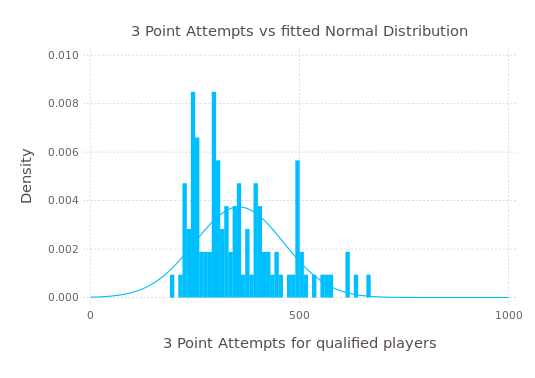

In [53]:
# plot for probablistic histogram for qualified attempts

# standardizing the histogram for the qualified
hist_att_prob_qual = stand_hist(att_counts_qual,bin_size_qual_att)

qual_att_normal_fit = fit(Normal, fg3_attempted_qua)
println(qual_att_normal_fit)

comp_att_normal_fit = 
    hist_fit_area(qual_att_normal_fit,hist_att_prob_qual,x_qual_att,100)
println(comp_att_normal_fit)

comp_att_normal_height_lin = 
    hist_fit_height(qual_att_normal_fit,hist_att_prob_qual,x_qual_att,1)
println(comp_att_normal_height_lin)

comp_att_normal_squared = 
    hist_fit_height(qual_att_normal_fit,hist_att_prob_qual,x_qual_att,2)
println(comp_att_normal_squared)

plot(layer(x = x_qual_att, y = hist_att_prob_qual, Geom.bar),
layer([x -> pdf(qual_att_normal_fit, x)]
      , 0,1000),
Guide.xlabel("3 Point Attempts for qualified players"),
Guide.ylabel("Density", orientation=:vertical),
Guide.title("3 Point Attempts vs fitted Normal Distribution"))

Cauchy(μ=328.0, σ=72.625)
0.8139348280202634
0.0580412181146206
0.00016719634198634372


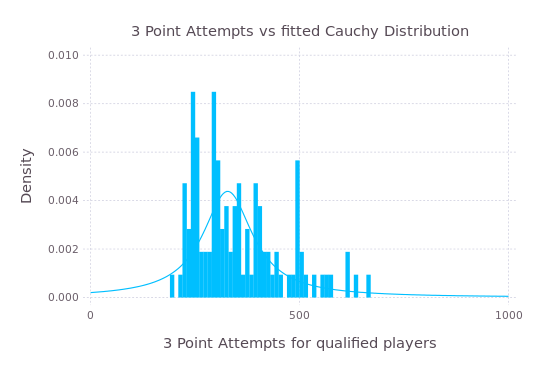

In [54]:
qual_att_cauchy_fit = fit(Cauchy, fg3_attempted_qua)
println(qual_att_cauchy_fit)

comp_att_cauchy_fit = 
    hist_fit_area(qual_att_cauchy_fit,hist_att_prob_qual,x_qual_att,100)
println(comp_att_cauchy_fit)

comp_att_cauchy_height_lin = 
    hist_fit_height(qual_att_cauchy_fit,hist_att_prob_qual,x_qual_att,1)
println(comp_att_cauchy_height_lin)

comp_att_cauchy_squared = 
    hist_fit_height(qual_att_cauchy_fit,hist_att_prob_qual,x_qual_att,2)
println(comp_att_cauchy_squared)

plot(layer(x = x_qual_att, y = hist_att_prob_qual, Geom.bar),
layer([x -> pdf(qual_att_cauchy_fit, x)]
      , 0,1000),
Guide.xlabel("3 Point Attempts for qualified players"),
Guide.ylabel("Density", orientation=:vertical),
Guide.title("3 Point Attempts vs fitted Cauchy Distribution"))

Laplace(μ=328.0, θ=105.26459999999999)
0.7421783457226716
0.058019330282103834
0.00015969029438715778


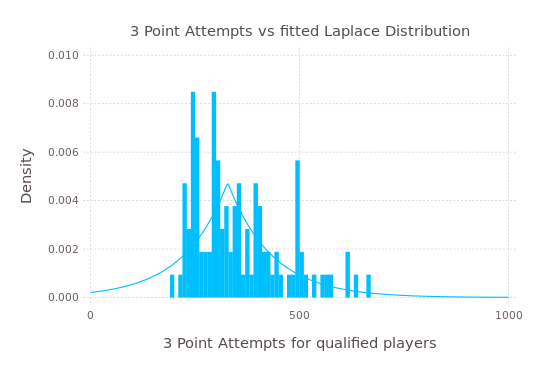

In [55]:
qual_att_laplace_fit = fit(Laplace, fg3_attempted_qua)
println(qual_att_laplace_fit)

comp_att_laplace_fit = 
    hist_fit_area(qual_att_laplace_fit,hist_att_prob_qual,x_qual_att,100)
println(comp_att_laplace_fit)

comp_att_laplace_height_lin = 
    hist_fit_height(qual_att_laplace_fit,hist_att_prob_qual,x_qual_att,1)
println(comp_att_laplace_height_lin)

comp_att_laplace_squared = 
    hist_fit_height(qual_att_laplace_fit,hist_att_prob_qual,x_qual_att,2)
println(comp_att_laplace_squared)

plot(layer(x = x_qual_att, y = hist_att_prob_qual, Geom.bar),
layer([x -> pdf(qual_att_laplace_fit, x)]
      , 0,1000),
Guide.xlabel("3 Point Attempts for qualified players"),
Guide.ylabel("Density", orientation=:vertical),
Guide.title("3 Point Attempts vs fitted Laplace Distribution"))

In [56]:
function convert_time(t)
    t_split = split(t,":")
    t_float = map(x -> float(x),t_split)
    time = t_float[1] + (t_float[2] / 60.)
    return time
end
  
# returns two lists of data (both adjusted per 36 minutes)
# first list is 3P shots made
# second list is 3P shots attempted
function shooting_data(d,p,num_poss)
    len = length(d)
    made = Float64[]
    attempted = Float64[]
    for i in 1:len
        name = "data/"*d[i]
        data = readcsv(name)
        row,col = size(data)
        for r in 1:row
            temp = data[r,1:30]
            if temp[2] != "" && temp[2] != "G"
                time = convert_time(temp[10])
                fg3 = (float(temp[14]))*36./time
                fg3_a = (float(temp[15]))*time/36.
                push!(made,fg3)
                push!(attempted,fg3_a)
            end
        end
    end
    return (made/p*num_poss, attempted/p*num_poss)
end

# returns the average numbers of possessions per 36 minutes
function av_pace_36(paces)
    return mean(paces)*36/48
end

function fiterror(v,λ)
    return sum(abs(v - exp(-λ)*Float64[λ^k/(factorial(BigInt(k))) 
        for k in 1:length(v)]))
end


function fitpoisson(v)
    λ = 1
    stepsize = 1.0
    while stepsize > 0.001
        if fiterror(v,λ+stepsize) < fiterror(v,λ)
            λ += stepsize
        elseif fiterror(v,λ-stepsize) < fiterror(v,λ)
            λ = max(0.0, λ - stepsize)
        else
            stepsize /= 2.0
        end
    end
    return λ,fiterror(v,λ)
end


kobe = ["kobe2012.csv","kobe2013.csv","kobe2014.csv","kobe2015.csv"]
curry = ["curry2013.csv","curry2014.csv","curry2015.csv"]
korver = ["korver2013.csv","korver2014.csv","korver2015.csv"]
harden = ["harden2013.csv","harden2014.csv","harden2015.csv"]
kobe_pace = av_pace_36([94.7,97.8,101.9,98.4])
curry_pace = av_pace_36([98.4,100.1,101.0])
korver_pace = av_pace_36([96.1,98.0,97.3])
harden_pace = av_pace_36([99.9,100.6,101.5])
kobe_made, kobe_attempted = shooting_data(kobe,kobe_pace,100)
curry_made, curry_attempted = shooting_data(curry,curry_pace,100)
korver_made, korver_attempted = shooting_data(korver,korver_pace,100)
harden_made,harden_attempted = shooting_data(harden,harden_pace,100)

kobe_games = length(kobe_made)
curry_games = length(curry_made)
korver_games = length(korver_made)
harden_games = length(harden_made)

println("kobe games: $kobe_games")
println("curry games: $curry_games")
println("korver games: $korver_games")
println("harden games: $harden_games")

kobe games: 177
curry games: 236
korver games: 220
harden games: 232


In [57]:
# plugging and chugging through the data to get

e_kobe_made, counts_kobe_made = hist(kobe_made,0:1:100)
kobe_made_stand = counts_kobe_made/sum(counts_kobe_made)
poisson_kobe_made, poisson_kobe_made_error = fitpoisson(kobe_made_stand)
d_poisson_kobe_made = Poisson(poisson_kobe_made)
println("Kobe's made shots poisson: λ = $poisson_kobe_made")
println("Kobe's made shots poisson error: $poisson_kobe_made_error")

e_kobe_attempted, counts_kobe_attempted = hist(kobe_attempted,0:1:100)
kobe_attempted_stand = 
    counts_kobe_attempted/sum(counts_kobe_attempted)
poisson_kobe_attempted, poisson_kobe_attempted_error = 
    fitpoisson(kobe_attempted_stand)
println("Kobe's attempted shots poisson: λ = $poisson_kobe_attempted")
println("Kobe's attempted shots poisson error: $poisson_kobe_attempted_error")

e_curry_made, counts_curry_made = hist(curry_made,0:1:100)
curry_made_stand = counts_curry_made/sum(counts_curry_made)
poisson_curry_made, poisson_curry_made_error = fitpoisson(curry_made_stand)
println("Curry's made shots poisson: λ = $poisson_curry_made")
println("Curry's made shots poisson error: $poisson_curry_made_error")

e_curry_attempted, counts_curry_attempted = hist(curry_attempted,0:1:100)
curry_attempted_stand = counts_curry_attempted/sum(counts_curry_attempted)
poisson_curry_attempted, poisson_curry_attempted_error = 
    fitpoisson(curry_attempted_stand)
println("Curry's attempted shots poisson: λ = $poisson_curry_attempted")
println("Curry's attempted shots poisson error: $poisson_curry_attempted_error")

e_korver_made, counts_korver_made = hist(korver_made,0:1:100)
korver_made_stand = counts_korver_made/sum(counts_korver_made)
poisson_korver_made, poisson_korver_made_error = fitpoisson(korver_made_stand)
println("Korver's made shots poisson: λ = $poisson_korver_made")
println("Korver's made shots poisson error: $poisson_korver_made_error")

e_korver_attempted, counts_korver_attempted = hist(korver_attempted,0:1:100)
korver_attempted_stand = counts_korver_attempted/sum(counts_korver_attempted)
poisson_korver_attempted, poisson_korver_attempted_error = 
    fitpoisson(korver_attempted_stand)
println("Korver's attempted shots poisson: λ = $poisson_korver_attempted")
println("Korver's attempted shots poisson error: $poisson_korver_attempted_error")


e_harden_made, counts_harden_made = hist(harden_made,0:1:100)
harden_made_stand = counts_harden_made/sum(counts_harden_made)
poisson_harden_made, poisson_harden_made_error = fitpoisson(harden_made_stand)
println("Harden's made shots poisson: λ = $poisson_harden_made")
println("Harden's made shots poisson error: $poisson_harden_made_error")

e_harden_attempted, counts_harden_attempted = hist(harden_attempted,0:1:100)
harden_attempted_stand = counts_harden_attempted/sum(counts_harden_attempted)
poisson_harden_attempted, poisson_harden_attempted_error = 
    fitpoisson(harden_attempted_stand)
println("Harden's attempted shots poisson: λ = $poisson_harden_attempted")
println("Harden's attempted shots poisson error: $poisson_harden_attempted_error")

Kobe's made shots poisson: λ = 3.22265625
Kobe's made shots poisson error: 0.34542410521352845
Kobe's attempted shots poisson: λ = 0.005859375
Kobe's attempted shots poisson error: 0.9941577576591378
Curry's made shots poisson: λ = 4.857421875
Curry's made shots poisson error: 0.27891289422787474
Curry's attempted shots poisson: λ = 0.0
Curry's attempted shots poisson error: 1.0
Korver's made shots poisson: λ = 4.513671875
Korver's made shots poisson error: 0.2629967826411718
Korver's attempted shots poisson: λ = 0.00390625
Korver's attempted shots poisson error: 0.9961013694701175
Harden's made shots poisson: λ = 3.458984375
Harden's made shots poisson error: 0.30064606446907777
Harden's attempted shots poisson: λ = 0.00390625
Harden's attempted shots poisson error: 0.9961013694701174


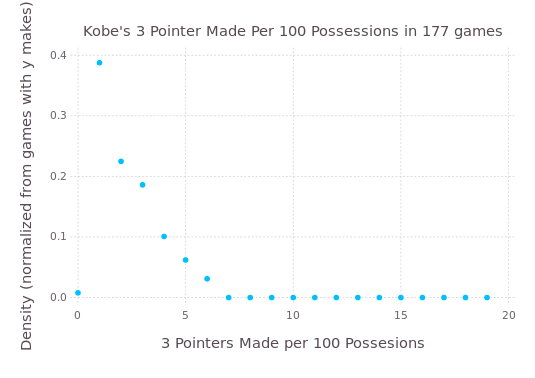

In [58]:
plot(x = e_kobe_made[1:20], y = kobe_made_stand[1:20],
Guide.xlabel("3 Pointers Made per 100 Possesions"),
Guide.ylabel("Density (normalized from games with y makes)", orientation=:vertical),
Guide.title("Kobe's 3 Pointer Made Per 100 Possessions in $kobe_games games"))

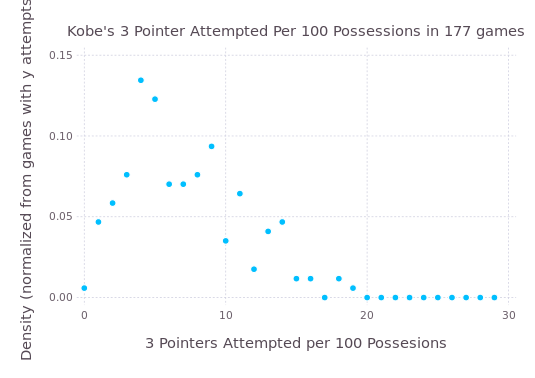

In [59]:
plot(x = e_kobe_attempted[1:30], y = kobe_attempted_stand[1:30],
Guide.xlabel("3 Pointers Attempted per 100 Possesions"),
Guide.ylabel("Density (normalized from games with y attempts)", orientation=:vertical),
Guide.title("Kobe's 3 Pointer Attempted Per 100 Possessions in $kobe_games games"))

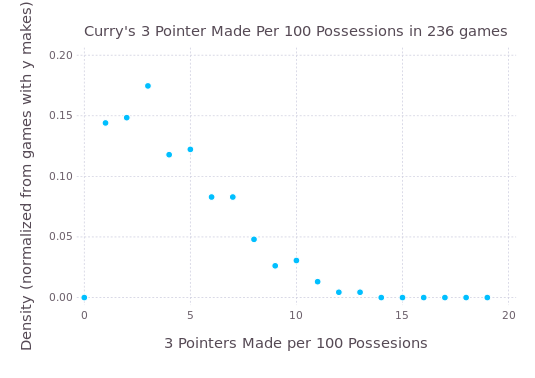

In [60]:
plot(x = e_curry_made[1:20], y = curry_made_stand[1:20],
Guide.xlabel("3 Pointers Made per 100 Possesions"),
Guide.ylabel("Density (normalized from games with y makes)", orientation=:vertical),
Guide.title("Curry's 3 Pointer Made Per 100 Possessions in $curry_games games"))

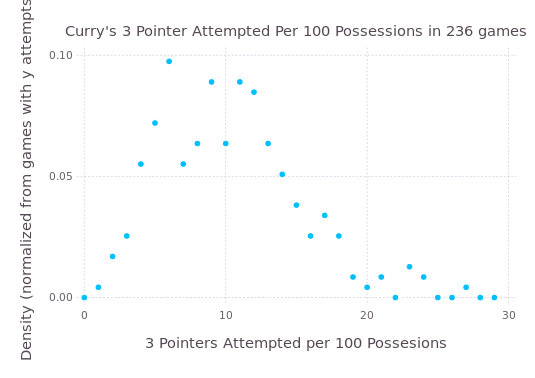

In [61]:
plot(x = e_curry_attempted[1:30], y = curry_attempted_stand[1:30],
Guide.xlabel("3 Pointers Attempted per 100 Possesions"),
Guide.ylabel("Density (normalized from games with y attempts)", orientation=:vertical),
Guide.title("Curry's 3 Pointer Attempted Per 100 Possessions in $curry_games games"))

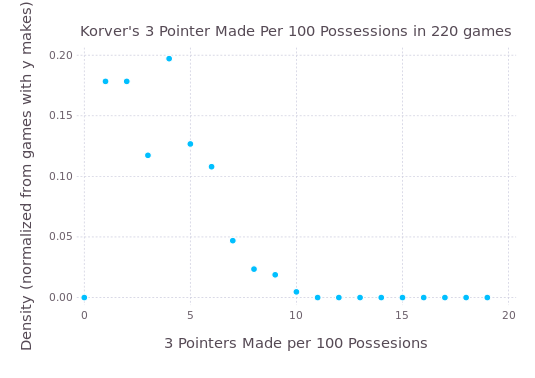

In [62]:
plot(x = e_korver_made[1:20], y = korver_made_stand[1:20],
Guide.xlabel("3 Pointers Made per 100 Possesions"),
Guide.ylabel("Density (normalized from games with y makes)", orientation=:vertical),
Guide.title("Korver's 3 Pointer Made Per 100 Possessions in $korver_games games"))

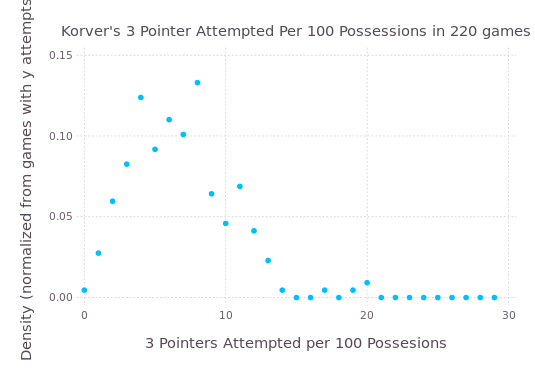

In [63]:
plot(x = e_korver_attempted[1:30], y = korver_attempted_stand[1:30],
Guide.xlabel("3 Pointers Attempted per 100 Possesions"),
Guide.ylabel("Density (normalized from games with y attempts)", orientation=:vertical),
Guide.title("Korver's 3 Pointer Attempted Per 100 Possessions in $korver_games games"))

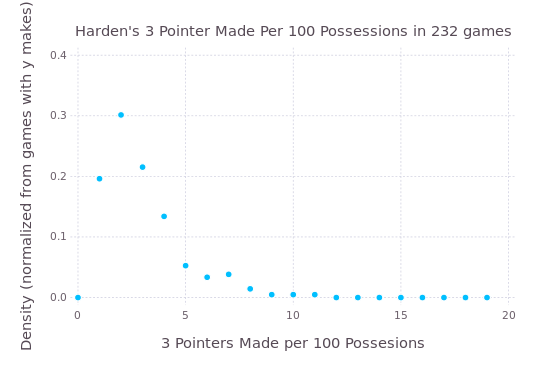

In [64]:
plot(x = e_harden_made[1:20], y = harden_made_stand[1:20],
Guide.xlabel("3 Pointers Made per 100 Possesions"),
Guide.ylabel("Density (normalized from games with y makes)", orientation=:vertical),
Guide.title("Harden's 3 Pointer Made Per 100 Possessions in $harden_games games"))

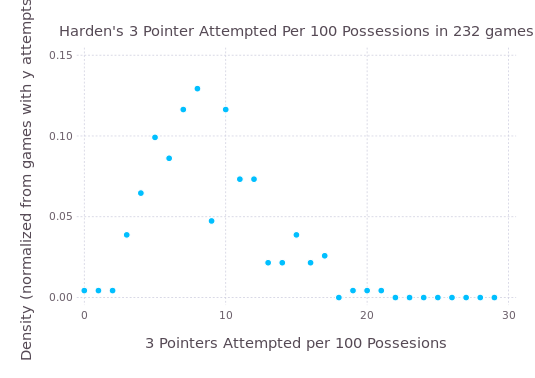

In [65]:
plot(x = e_harden_attempted[1:30], y = harden_attempted_stand[1:30],
Guide.xlabel("3 Pointers Attempted per 100 Possesions"),
Guide.ylabel("Density (normalized from games with y attempts)", orientation=:vertical),
Guide.title("Harden's 3 Pointer Attempted Per 100 Possessions in $harden_games games"))